# Storm arrival case
## Observing the effects of winds on waves: 2021-10-24 08:00-16:00, "poster front" analysis and summary
### Jackson Krieger
**07/24/2024**

In [1]:
import xarray as xr
import numpy as np
import sys
sys.path.append('/Users/jkrieger/work/member-Krieger/saildrone_analysis/Pilot_Analysis_NBs')
import saildrone_analysis as sd
import matplotlib.pyplot as plt

In [2]:
# Pilot campaign data
pilot_1062 = xr.load_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/Saildrones/SMODE_Pilot_1062.nc')
pilot_1072 = xr.load_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/Saildrones/SMODE_Pilot_1072.nc')
pilot_1073 = xr.load_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/Saildrones/SMODE_Pilot_1073.nc')
pilot_1074 = xr.load_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/Saildrones/SMODE_Pilot_1074.nc')
pilot_1075 = xr.load_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/Saildrones/SMODE_Pilot_1075.nc')

# SMODE data
wind_smode_2021 = xr.open_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/smode_data/wind_smode_2021.nc')

# NCOM
ncom = xr.open_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/smode_data/NCOM_2021.nc')

# Current
current_2021 = xr.open_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/smode_data/current_2021.nc')

# WAVEWATCH
ww_2021 = xr.load_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/smode_data/WW3_SMODE_Pilot.nc')

# Buoy
buoy_ds = xr.open_dataset('/Users/jkrieger/work/member-Krieger/saildrone_analysis/smode_data/029p1_historic.nc')

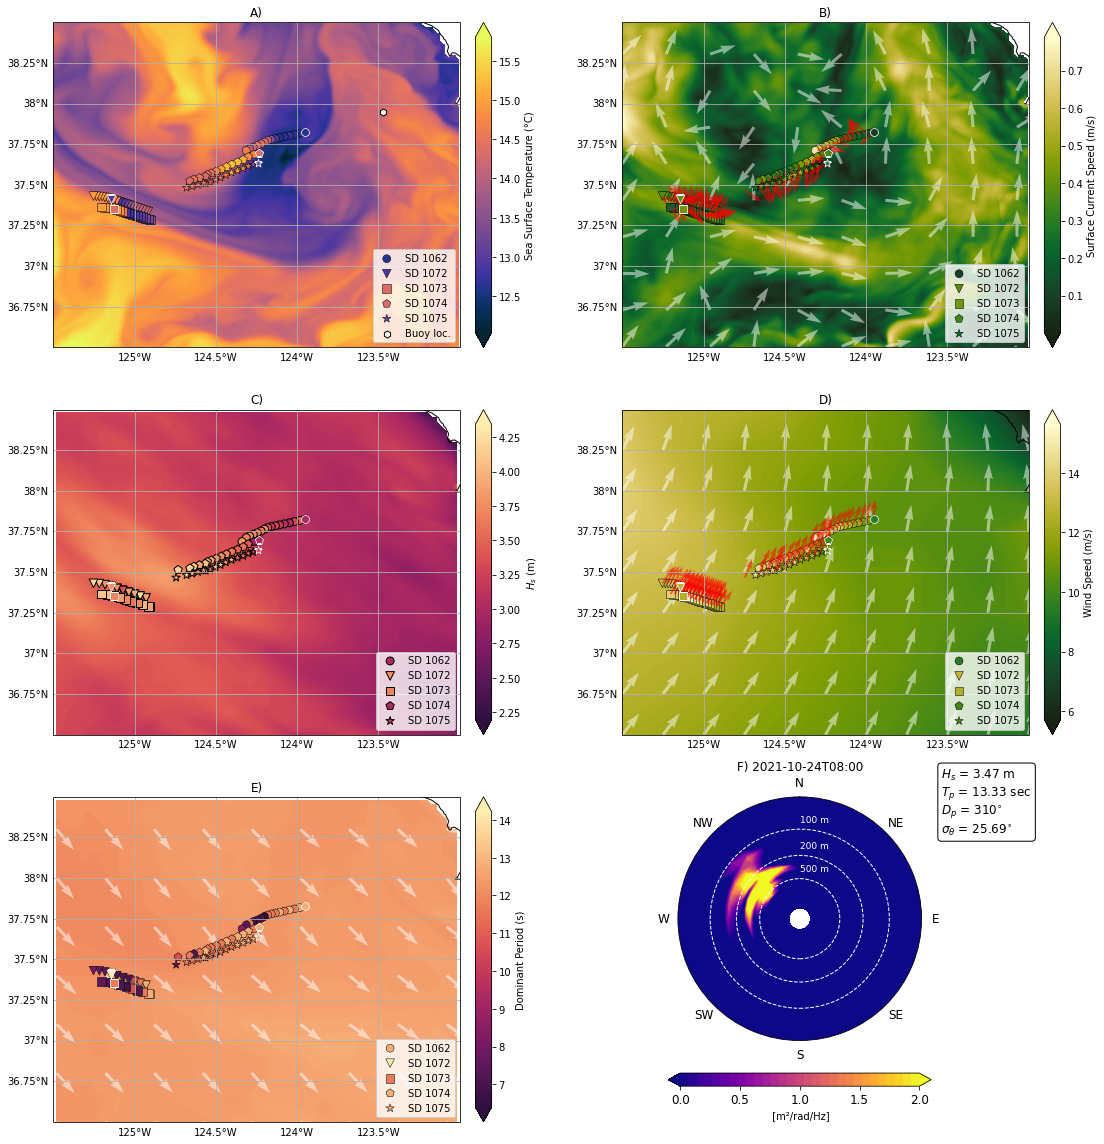

In [3]:
plt.rcParams['font.family'] = 'sans-serif'  # Choose desired font family
plt.rcParams['font.size'] = 15 # increase fontsize

date_saildrone_obs = np.datetime64('2021-10-24T08:00') # studied date
buoy_slice = buoy_ds.sel(waveTime = date_saildrone_obs, method = 'nearest')

# compute 2d spectrum
ds_spec = sd.buoy_spectrum2d(buoy_slice.waveEnergyDensity.values,\
                          buoy_slice.waveA1Value.values, \
                          buoy_slice.waveA2Value.values,\
                          buoy_slice.waveB1Value.values,\
                          buoy_slice.waveB2Value.values,
                          buoy_slice.waveFrequency.values,\
                          date_saildrone_obs,\
                          dirs = np.arange(0,365,10))

hs, tp, dp, sigma_th = sd.compute_wave_parameter(ds_spec) # compute wave parameters to display in directional spectrum plot

start_date = '2021-10-24T08:00:00.000000000' # start date and time of front
end_date = '2021-10-24T16:00:00.000000000' # end date and time of front
pilots = [pilot_1062, pilot_1072, pilot_1073, pilot_1074, pilot_1075] # array of saildrone data 
models = [ncom, wind_smode_2021, current_2021, ww_2021] # array of model data
front_fig = sd.model_front_validation_w_spec(pilots, models, start_date, end_date, buoy_ds, ds_spec)

**Figure 1: Subplot of ocean variables from models (background maps) and Saildrone measurements along their trajectories (markers). The first saildrone observations are represented with the white marker. The background maps correspond to the time of the first Saildrone observation. Panel (A) shows the sea surface temperature (SST), (B) shows the surface currents, model data are from Naval Coastal Operational Model (NCOM). Panel (C) and (E) show the Significant wave height ($H_{s}$) and the dominant wave period ($T_{p}$) respectively, model data is from WAVEWATCH III. Panel (D) shows the wind speed, model data is from the fifth generation ECMWF atmospheric reanalysis (ERA-5). Grey arrows depict variable directions according to the model data and red arrows depict variable directions as recorded by the Saildrones. Panel (F) is the frequency-direction wave spectrum observed by the closest wave buoy (station-029).**

#########\
**Figure 2 is a GIF of the evolution of figure 1 over time.** \
**The file size is too large for GitHub to display in a notebook.** \
**The link below will take you to the gif in another tab.** \
#########

[Click here to view figure 2](https://github.com/mines-oceanography/saildrone_synthesis/blob/main/figures/poster_front_sequential_quiver.gif)

**Figure 2: Subplot gif of figure 1. Saildrone observations and trajectory as well as directional wave spectrum evolve as time increases in 30 minute increments.**

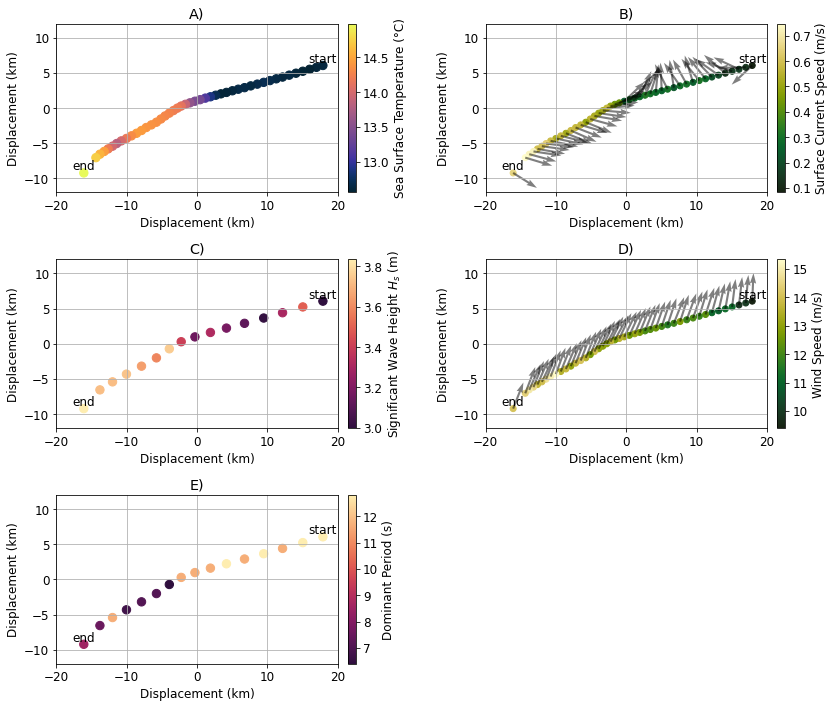

In [4]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12 # decrease fontsize to fit with subplots

fig = sd.single_sd_front_scatters(pilot_1062, start_date, end_date, ylim=12)

**Figure 3: Zoomed in subplot around Saildrone 1062 trajectory, Saildrone of interest for this particular front. X and Y axes are converted to displacement in kilometers from longitude and latitude.  Plotted variables are (A) sea surface temperature, (B) surface current speed, (C) significant wave height ($H_s$), (D) wind speed, and (E) dominant period ($T_p$).**

#########\
**Figure 4 is a GIF of the evolution of figure 3 over time with model data and wave spectrum added.** \
**The file size is too large for GitHub to display in a notebook.** \
**The link below will take you to the gif in another tab.** \
#########

[Click here to view figure 4](https://github.com/mines-oceanography/saildrone_synthesis/blob/main/figures/sd_1062_zoomed_poster_front.gif)

**Figure 4: Subplot gif of figure 3 with model data and wave spectrum added. Saildrone observations and trajectory as well as directional wave spectrum evolve as time increases. Grey arrows depict variable directions according to the model data and red arrows depict variable directions as recorded by the Saildrone.**

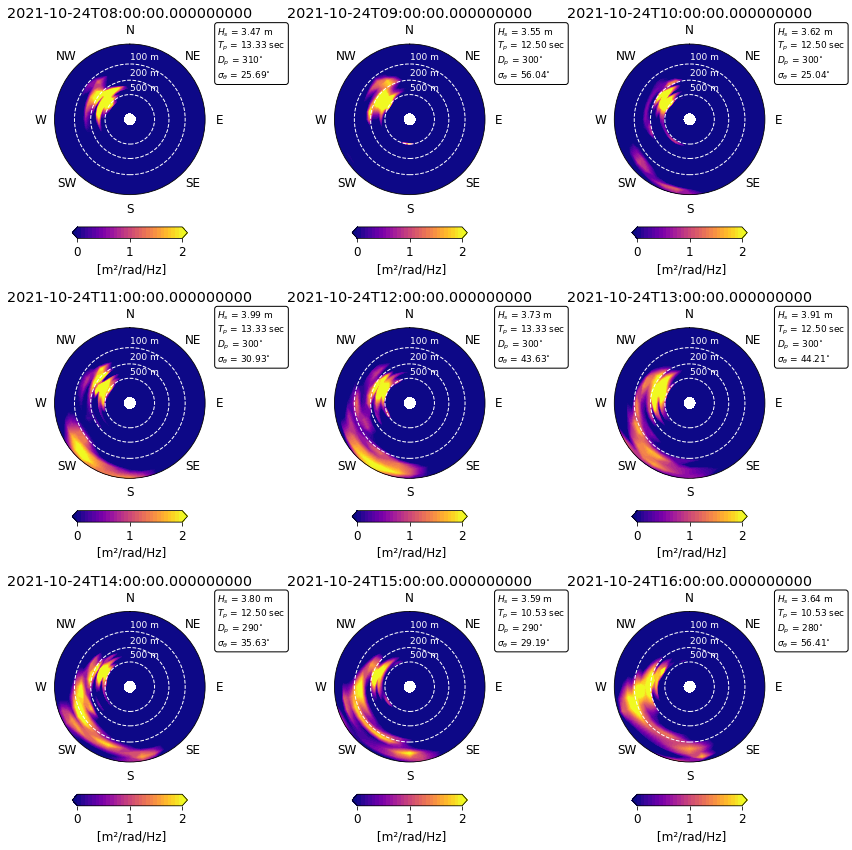

In [5]:
spec = sd.plot_wave_parameters_over_time(buoy_ds, start_date, end_date)

**Figure 5: Static time series subplot of directional wave spectrum calculated from observations recorded by moored CDIP buoy 029. The spectrum represents surface wave energy along wavelength and direction in polar coordinates.**

|**Campaign**|**Saildrone ID**|**Start**|**End**|**Mean Sea Surface Temperature (˚C)**|**Mean Surface Current Speed (m/s)**|**Mean Significant Height $H_s$ (m)**|**Mean Wind Speed (m/s)**|**Mean Dominant Period $T_p$ (s)**|
|:-------|:---------:|:---------:|:---------:|:---------:|:-------:|:-------:|:-------:|-------:|
|Pilot|1062|10/24 08:00|10/24 16:00|13.52|0.18|3.44|12.81|10.28|
|Pilot|1072|10/24 08:00|10/24 16:00|14.11|0.23|3.94|13.56|10.93|
|Pilot|1073|10/24 08:00|10/24 16:00|13.63|0.25|3.82|13.55|10.82|
|Pilot|1074|10/24 08:00|10/24 16:00|14.72|0.34|3.72|12.92|11.73|
|Pilot|1075|10/24 08:00|10/24 16:00|14.39|0.33|3.83|12.75|11.73|

**Table 1: Table summarizing wave variable averages presented for all Saildrones along the time of interest.**

### Analysis and summary
While travelling from east to west along a distance of 38 km over 8 hours, Saildrone 1062 observes a 2.3 $^{\circ}$ C increase in sea surface temperature and a 5.9 m/s increase in wind speed. This is our front of interest. Along this front, the Saildrone also observed a 0.8 m increase in $H_s$ and a 6.3 s decrease in $T_p$. We explored the possibility that this increase in $H_s$ may be due to the concertina effect because of the decrease in $T_p$. However, because current and wave directions are not aligned (see figure 1 panels B and E), we were able to dismiss this idea. Then, we believed that the variability in wave parameters we observed is due to the increase in sea surface temperature enhancing near surface winds (Seo et al. 2023), subsequently increasing $H_s$ and decreasing $T_p$. In theory, stronger winds generate higher waves with shorter periods, which may contribute to an overall increase in $H_s$ (Holthuijsen, chapter 3). However, further analysis disproves this thought. As the model data in the background of figure 2 evolves, a large system in $H_s$, wind speed, and $T_p$ can be seen moving in from the northwest starting at 2021-10-24T10:00. Wind speeds increase from 9.4 m/s to 15.5 m/s which results in $H_s$ increasing from 3 m to 3.8 m and $T_p$ decreasing from 12.8 s to 6.5 s. This invalidates the assumption we made on the potential effect of the change of SST on the wind, subsequently on $H_s$ and $T_p$. The changes in $H_s$ and $T_p$ are dominated by this large scale atmospheric system (1000 km) even though the changes recorded by the Saildrone 1062 are spotted at the submesoscale range (1-10 km).


While the case studied in the storm arrival example cannot be used to analyze submesoscale interactions, it is a good example of the complexities of Saildrone observations. Having spatial and temporal domains tied creates room for error in the interpretations of cases like this one where a storm arrival is not obvious without the use of background model data. In contrast, other methods like satellite based remote sensing observations would allow insight into these large scale processes but are limited by spatial resolution and the rate of data acquisition. Additionally, Saildrones have the ability to be remotely controlled and follow any potential front or area of interest whereas satellite observations are limited by their orbital path and period.


### References
Holthuijsen, L. H. (2010). Waves in oceanic and coastal waters. Cambridge university press.\
Frenger, I., Gruber, N., Knutti, R., & Münnich, M. (2013). Imprint of Southern Ocean eddies on winds, clouds and rainfall. Nature geoscience, 6(8), 608-612. \
Seo, H., O’Neill, L. W., Bourassa, M. A., Czaja, A., Drushka, K., Edson, J. B., ... & Wang, Q. (2023). Ocean mesoscale and frontal-scale ocean–atmosphere interactions and influence on large-scale climate: A review. Journal of climate, 36(7), 1981-2013.